# Introduction to qubits
In this exercise we combine the notions of complex numbers, probability theory, and linear algebra to represent qubits in a quantum computer. 

First, let's make sure we have the `numpy` library imported. 

In [1]:
import numpy as np

## Exercise 1
Define a complex-valued vector $|v\rangle$ which will represent the state of $n$ qubits. Start with finding the size of the vector. How many components should $|v\rangle$ have? Remember, for 1 qubit $|v\rangle$ has 2 components (representing 0 and 1), for 2 qubits $|v\rangle$ has 4 components (which represent 4 possibilities 00, 01, 10, and 11). You can define n as a variable, initialize it, and then write everything in terms of n. 

In [2]:
n = 4
dimension = 2**n
v = np.zeros(dimension, dtype=np.complex128)
print(np.shape(v))

(16,)


## Exercise 2
Assign random numbers (let's say between 0 and 1) to the components of $|v\rangle$. Now calculate the norm (magnitude) of $|v\rangle$. Remeber that $|v\rangle$ is a complex-valued vector so you need to be careful about implementing the definition of norm $\sqrt{\langle v|v\rangle}$. Run the code multiple times. You should get different values each time. 

In [59]:
real = np.random.rand(dimension)
imag = np.random.rand(dimension)
v = real + 1j*imag

# calculate norm of v
def norm(v):
    norm = np.sqrt(np.dot(np.conjugate(v), v))
    return norm
print(norm(v))

(3.268100551559395+0j)


## Exercise 3
In quantum physics, state vectors (such as $|v\rangle$) should be normalized, meaning that their norm should be equal to 1. Make sure every random vector your code generates has a norm equal to 1. 

In [68]:
v_normalized = v/norm(v)
print(v)
print(v_normalized)
print(norm(v))
print(norm(v_normalized))

[0.62982919+0.94564492j 0.96970026+0.15031256j 0.23395907+0.64154217j
 0.40419586+0.11656623j 0.9251431 +0.04485872j 0.33798357+0.81202971j
 0.36151925+0.44694751j 0.18448273+0.68893485j 0.45219997+0.10104955j
 0.6918147 +0.15739621j 0.79806489+0.22881363j 0.74305334+0.92444299j
 0.02460125+0.32877531j 0.50995205+0.03251995j 0.99684398+0.37569938j
 0.7634096 +0.6412498j ]
[0.19272026+0.28935613j 0.29671678+0.04599386j 0.0715887 +0.19630429j
 0.12367914+0.03566788j 0.28308282+0.01372623j 0.10341896+0.24847146j
 0.1106206 +0.13676064j 0.05644953+0.21080589j 0.13836783+0.03091996j
 0.21168709+0.04816137j 0.24419839+0.07001426j 0.22736551+0.28286859j
 0.00752769+0.10060135j 0.15603928+0.00995072j 0.30502243+0.11495955j
 0.23359428+0.19621483j]
(3.268100551559395+0j)
(1+0j)


## Calculating Measurement Probabilities
Now we will calculate the probabilities of finding qubits in a specific state. Let's go back to the 2 qubit example. The state vector $|v\rangle$ has four components which represent 00, 01, 10, and 11, respectively. More clearly, for a generic $|v\rangle$ we can write 
$$
|v\rangle = \begin{pmatrix} a \\ b \\ c \\ d \end{pmatrix}, 
$$
and  
$$ 
|00\rangle = \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \end{pmatrix},\quad |01\rangle = \begin{pmatrix} 0 \\ 1 \\ 0 \\ 0 \end{pmatrix},\quad |10\rangle = \begin{pmatrix} 0 \\ 0 \\ 1 \\ 0 \end{pmatrix},\quad |11\rangle = \begin{pmatrix} 0 \\ 0 \\ 0 \\ 1 \end{pmatrix}.
$$
Therefore, 
$$
|v\rangle = a |00\rangle + b |01\rangle + c |10\rangle + d |11\rangle. 
$$

Now, if we measure this system of 2 qubits we will get 00 or 01 or 10 or 11 randomly. The probability of getting any of these values is dictated by components of $|v\rangle$. The formal way of calculating these probabilities is by calculatign the **square of inner product** of the desired state, e.g. $|00\rangle$ and the actual state $|v\rangle$. For example, 

$$ 
\textrm{Probability of measuring 00} = |\langle 00|v\rangle|^2, 
$$
where 
$$
\langle 00|v\rangle = (1, 0, 0, 0) \begin{pmatrix} a \\ b \\ c \\ d \end{pmatrix} = a. 
$$
Therefore, 

$$ 
\textrm{Probability of measuring 00} = |\langle 00|v\rangle|^2 = |a|^2 = aa^*.  
$$

## Exercise 4
Write a function that takes the state vector $|v\rangle$ (which you defined before for a given n number of qubits) and prints out all the possible states along with their corresponding measurement probability. For example if $|v\rangle$ has 4 components your function should print 00 and its probability and then in another line print 01 and its probability and so on. 

In [92]:
def print_probabilities(v):
    sum = 0
    for i in range(len(v)):
        p = abs(np.conjugate(v[i])*v[i])
        sum = sum + p
        print("state: {0:04b}".format(i) + ", p = {0:.4f}".format(p))
    print("total probability = {0:.4f}".format(sum))

In [93]:
print_probabilities(v_normalized)

state: 0000, p = 0.1209
state: 0001, p = 0.0902
state: 0010, p = 0.0437
state: 0011, p = 0.0166
state: 0100, p = 0.0803
state: 0101, p = 0.0724
state: 0110, p = 0.0309
state: 0111, p = 0.0476
state: 1000, p = 0.0201
state: 1001, p = 0.0471
state: 1010, p = 0.0645
state: 1011, p = 0.1317
state: 1100, p = 0.0102
state: 1101, p = 0.0244
state: 1110, p = 0.1063
state: 1111, p = 0.0931
total probability = 1.0000


## Example
plot the probabilities vs the state in a bar plot 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

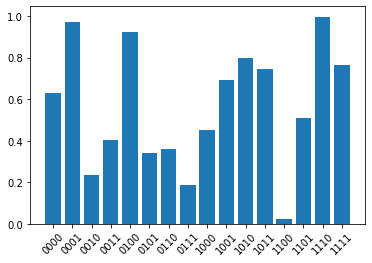

In [120]:
import matplotlib.pyplot as plt

states = []
for i in range(len(v)):
    s = "{0:04b}".format(i)
    states.append(s)

prob = list(np.real(np.conjugate(v_normalized)*v_normalized))
    
plt.bar(states, v)
plt.xticks(rotation=45)

## Example:
come up with a state vector that represents entangled qubits, meaning that either all are zero or all are one. Remember to normalize your vector. This is called a GHZ state or Bell State. Plot the states agian. 


In [11]:
v = np.zeros(dimension, dtype=np.complex128)
v[0] = 1/np.sqrt(2)
v[-1] = 1/np.sqrt(2)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

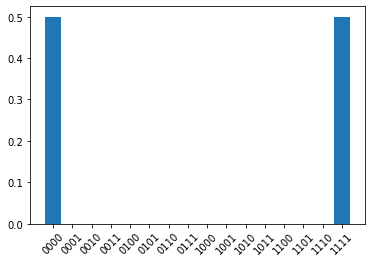

In [17]:
import matplotlib.pyplot as plt

v_normalized = v
states = []
for i in range(len(v)):
    s = "{0:04b}".format(i)
    states.append(s)

prob = list(np.real(np.conjugate(v_normalized)*v_normalized))
    
plt.bar(states, prob)
plt.xticks(rotation=45)

## Exercise 5
write a function that takes two vectors as input and returns their tensor product. 

In [23]:
def tensor_product(u, v):
    prod = np.zeros(len(u)*len(v))
    for i in range(len(u)):
        prod[i*len(v):(i+1)*len(v)] = u[i]*v
    return prod

u = np.array([1, -1, 2])
v = np.array([0.6, 0.7, 0.8])
print(tensor_product(u, v))

[ 0.6  0.7  0.8 -0.6 -0.7 -0.8  1.2  1.4  1.6]


## Exercise 6 
Write a function that calculates the tensor product of two matrices. 

In [29]:
def tensor_product(A, B):
    m = np.shape(A)[0]
    n = np.shape(A)[1]
    r = np.shape(B)[0]
    p = np.shape(B)[1]
    prod = np.zeros((m*r, n*p))
    for i in range(m):
        for j in range(n):
            prod[i*r:(i+1)*r, j*p:(j+1)*p] = A[i, j]*B
    return prod

X = np.array([[0, 1], [1, 0]])
Z = np.array([[1, 0], [0, -1]])
print(tensor_product(X, Z))

[[ 0.  0.  1.  0.]
 [ 0.  0.  0. -1.]
 [ 1.  0.  0.  0.]
 [ 0. -1.  0.  0.]]


## Exercise 7
Write a function that takes a 2x2 matrix and breaks it down into a linear combination of Pauli matrices, e.g. X, Y, Z, I and prints the result. 

In [3]:
import numpy as np
def print_pauli(A):
    c1 = (A[0, 1] + A[1, 0])/2
    c2 = (A[0, 1] - A[1, 0])/(2j)
    c3 = (A[0, 0] + A[1, 1])/2
    c4 = (A[0, 0] - A[1, 1])/2
    print(f"{c1}X + {c2}Y + {c3}Z + {c4}I")
    
M = np.array([[1, 1], [-1, 3]])
print_pauli(M)

0.0X + -1jY + 2.0Z + -1.0I
